<a href="https://colab.research.google.com/github/DanielMartinAlarcon/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

## In-class example

In [4]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

### Make the figure look right

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install --upgrade seaborn
import seaborn as sns

fake = pd.Series([38,3,1,2,1,4,6,5,5,33], index=range(1,11))

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


Text(-2,46,'IMDB ratings for the film as of Aug. 29')

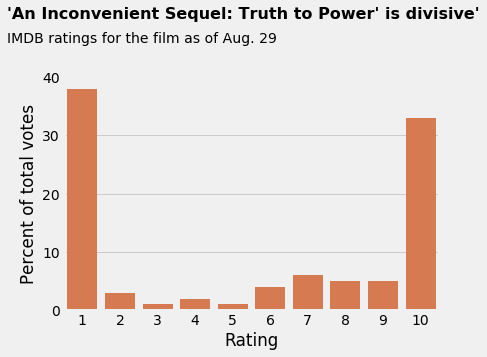

In [6]:
plt.style.use('fivethirtyeight');
ax = sns.barplot(x=fake.index, y=fake.values, color='#EC713B');

ax.set(xlabel='Rating',
      ylabel='Percent of total votes',
      yticks=range(0,50,10));

ax.tick_params(labelrotation=0);

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive'", 
        fontsize=16, fontweight='bold');

ax.text(x=-2, y=46, s='IMDB ratings for the film as of Aug. 29')

### Populate figure with the real data

In [0]:
pd.options.display.max_columns = 50
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# Turn the timestamps from strings to actual time stamps
df.timestamp = pd.to_datetime(df.timestamp)

In [0]:
# set the timestamp to be the index.
df.set_index('timestamp', inplace=True)


In [10]:
columns = ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']
final = df[columns].tail(1)
final.columns = range(1,11)
final 

,1,2,3,4,5,6,7,8,9,10
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
colors = ['#333333']*10
colors[0] = '#EC713B'
colors[-1] = '#EC713B'

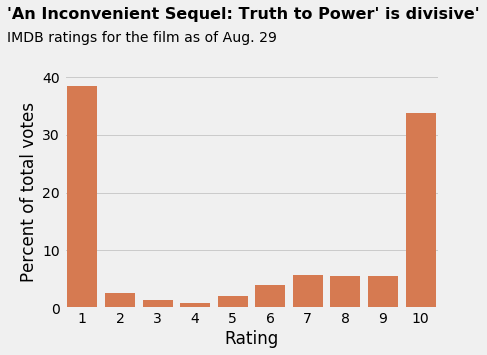

In [12]:
plt.style.use('fivethirtyeight');
ax = sns.barplot(x=final.columns, y=final.values[0], color='#EC713B');

ax.set(xlabel='Rating',
      ylabel='Percent of total votes',
      yticks=range(0,50,10));

ax.tick_params(labelrotation=0);

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive'", 
        fontsize=16, fontweight='bold');

ax.text(x=-2, y=46, s='IMDB ratings for the film as of Aug. 29');

## Next visualization

In [13]:
# First, let's look at the graph itself

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/methahickey-inconvenient-0830-6.png'
example = Image(url=url, width=600)

display(example)

I don't want to have to generate fake data that fits this pattern, so I'll work instead on extracting the real data first.

In [14]:
# I create new dataframe columns for the number of respondents in several rating ranges
df['1/10'] = df['respondents']*df['1_pct']*0.01
df['10/10'] = df['respondents']*df['10_pct']*0.01
df['2-9/10'] = df['respondents']-df['1/10']-df['10/10']
print(df.shape)
df.head()

(80053, 29)


,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,1/10,10/10,2-9/10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6,196.98,135.072,69.948
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8,15.99,48.984,13.026
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,2.00,1.000,1.000
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,2.00,1.000,1.000
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2,40.95,63.960,25.090


In [0]:
# The fact that time is sampled to the nanosecond creates a problem, because
# each row for men and women winds up being separate even if they're from the
# same microsecond.  So let's bin that a bit. 



males = df[df.category == 'Males'].resample('5T').max().dropna()
females = df[df.category == 'Females'].resample('5T').max().dropna()

In [0]:
# I combine men and women into a new dataframe, and create new columns for each
# individual score group. 

ratings = pd.DataFrame({'males':males.respondents, 
                        'females':females.respondents,
                        '1 out of 10 ratings':males['1/10'] + females['1/10'],
                        '10 out of 10 ratings':males['10/10'] + females['10/10'],
                        '2-9 out of 10 ratings':males['2-9/10'] + females['2-9/10']
                       })

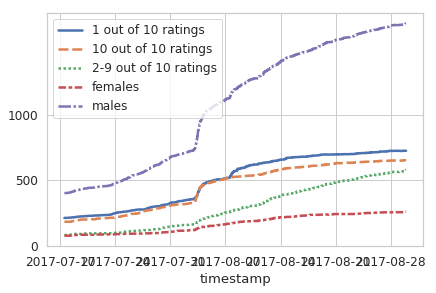

In [17]:
# And now I plot.

sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2.5})

ax = sns.lineplot(data=ratings);
ax.set(yticks=range(0,1500,500));


In [18]:
'''
Since the 

And those are the only parts that actually worked. Most of my problems were 
with @#$%^& Seaborn itself, though, as most of the time 
trying to change some of the aesthetic parameters totally backfired for some 
reason.  I managed to change the line widths, but not the type of line or their 
color, and I didn't even try to change the timestamp labels on the axes.

'''

"\nSince the \n\nAnd those are the only parts that actually worked. Most of my problems were \nwith @#$%^& Seaborn itself, though, as most of the time \ntrying to change some of the aesthetic parameters totally backfired for some \nreason.  I managed to change the line widths, but not the type of line or their \ncolor, and I didn't even try to change the timestamp labels on the axes.\n\n"

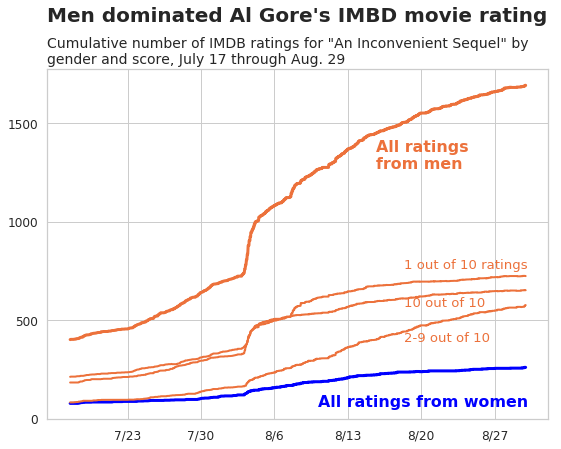

In [103]:
# Let's plot again, this time with matplotlib only

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(ratings['males'], linewidth=3, color='#EC713B');
fig.text(0.65,0.65, "All ratings \nfrom men", size='large', color='#EC713B',
        weight='bold');

plt.plot(ratings['females'], linewidth=3, color='blue');
fig.text(0.55,0.1, "All ratings from women", size='large', color='blue',
        weight='bold');

plt.plot(ratings['1 out of 10 ratings'], linewidth=2, color='#EC713B');
fig.text(0.7,0.42, "1 out of 10 ratings", size='medium', color='#EC713B',
        weight='roman');

plt.plot(ratings['10 out of 10 ratings'], linewidth=2, color='#EC713B');
fig.text(0.7,0.33, "10 out of 10", size='medium', color='#EC713B',
        weight='roman');

plt.plot(ratings['2-9 out of 10 ratings'], linewidth=2, color='#EC713B');
fig.text(0.7,0.25, "2-9 out of 10", size='medium', color='#EC713B',
        weight='roman');

ax.set(yticks=range(0,1600,500));
plt.xticks(['2017-07-23','2017-07-30','2017-08-06','2017-08-13','2017-08-20',
            '2017-08-27'],['7/23','7/30','8/6','8/13','8/20','8/27']);

fig.suptitle("Men dominated Al Gore's IMBD movie rating",
             fontsize=20, weight='semibold', horizontalalignment='left', 
             x=0.08, y=1.025);
ax.set_title('Cumulative number of IMDB ratings for "An Inconvenient Sequel" '
             'by\ngender and score, July 17 through Aug. 29',
             horizontalalignment='left', x=0, fontsize=14);
